In [15]:
import pandas as pd

# Load dataset
data = pd.read_csv("C:/Users/Asus/Downloads/myntra202305041052.csv")
data.head()

,id,name,img,asin,price,mrp,rating,ratingTotal,discount,seller,purl
0,1,Men Solid Oversized Cotton,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,532.0,1299.0,4.1,5300,59,Difference of Opinion,https://www.myntra.com/tshirts/difference-of-o...
1,2,Men Cotton Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,274.0,499.0,4.2,25400,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...
2,3,Women Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,551.0,1199.0,4.5,3400,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...
3,4,Typography Print T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,296.0,1099.0,4.0,18400,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...
4,5,Printed Round Neck Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,494.0,899.0,4.2,3800,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060213 entries, 0 to 1060212
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1060213 non-null  int64  
 1   name         1060213 non-null  object 
 2   img          1060213 non-null  object 
 3   asin         1060213 non-null  object 
 4   price        1060213 non-null  float64
 5   mrp          1060213 non-null  float64
 6   rating       1060213 non-null  float64
 7   ratingTotal  1060213 non-null  int64  
 8   discount     1060213 non-null  int64  
 9   seller       1060213 non-null  object 
 10  purl         1060213 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 89.0+ MB


In [17]:
print(data.isnull().sum())


id             0
name           0
img            0
asin           0
price          0
mrp            0
rating         0
ratingTotal    0
discount       0
seller         0
purl           0
dtype: int64


In [20]:
data['price'] = data['price'].astype(float)
data['mrp'] = data['mrp'].astype(float)
data['rating'] = data['rating'].astype(float)
data['ratingTotal'] = data['ratingTotal'].astype(int)
data['discount'] = data['discount'].astype(float)

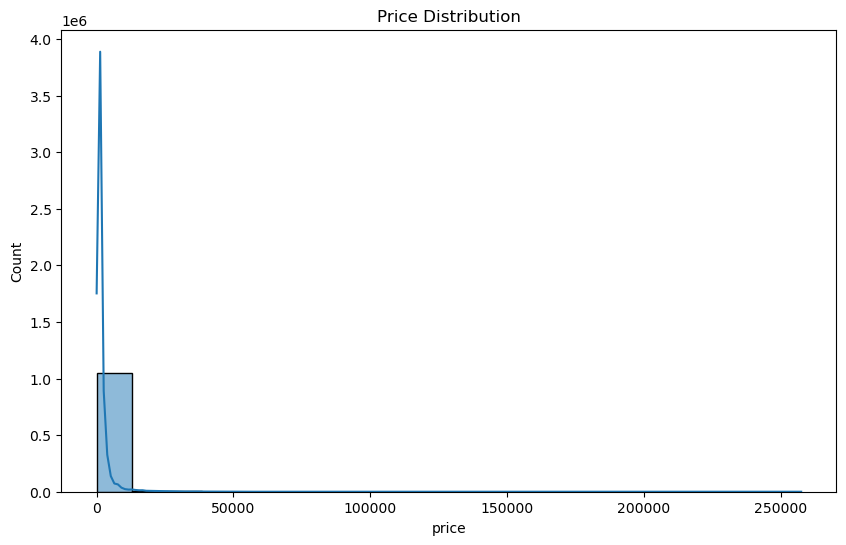

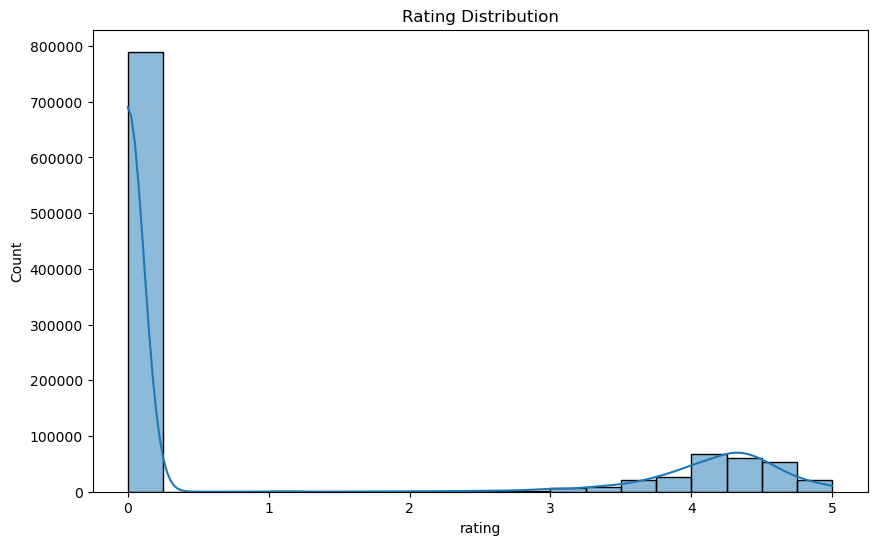

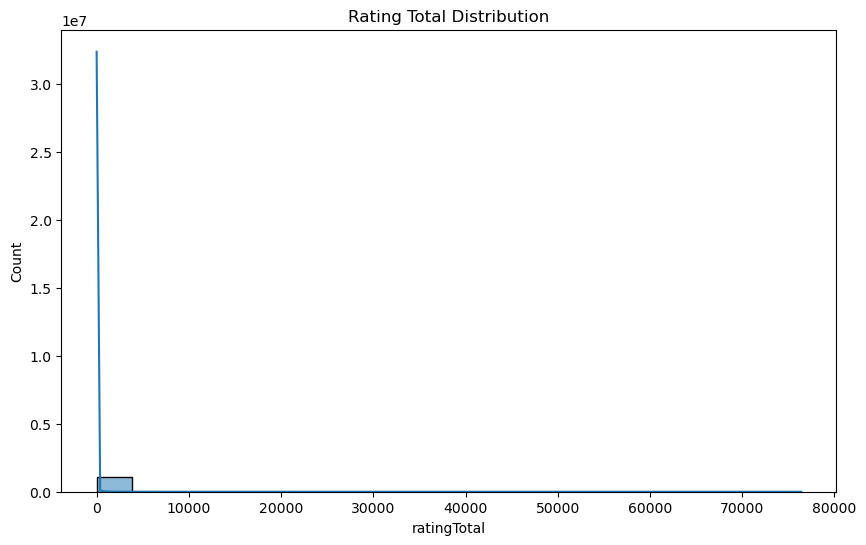

In [21]:
# inspecting the data
import matplotlib.pyplot as plt
import seaborn as sns

# price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=20, kde=True)
plt.title('Price Distribution')
plt.show()

#rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=20, kde=True)
plt.title('Rating Distribution')
plt.show()

# rating total distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['ratingTotal'], bins=20, kde=True)
plt.title('Rating Total Distribution')
plt.show()


In [25]:
#forcasting model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable
features = ['price', 'mrp', 'rating', 'ratingTotal', 'discount']
target = 'ratingTotal'
# Split the data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# model
model = LinearRegression()
model.fit(X_train, y_train)

#predictions
y_pred = model.predict(X_test)
y_pred

array([-1.78897290e-12,  1.90000000e+01, -2.01905023e-12, ...,
       -4.12492626e-12, -2.02890754e-12, -1.46512951e-12])

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

#Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

#Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

#R-Squared (R²)
r2 = r2_score(y_test, y_pred)
print(f'R-Squared: {r2}')


Mean Absolute Error: 3.3609187280637395e-12
Mean Squared Error: 6.2779613574606e-23
Root Mean Squared Error: 7.923358730652425e-12
R-Squared: 1.0


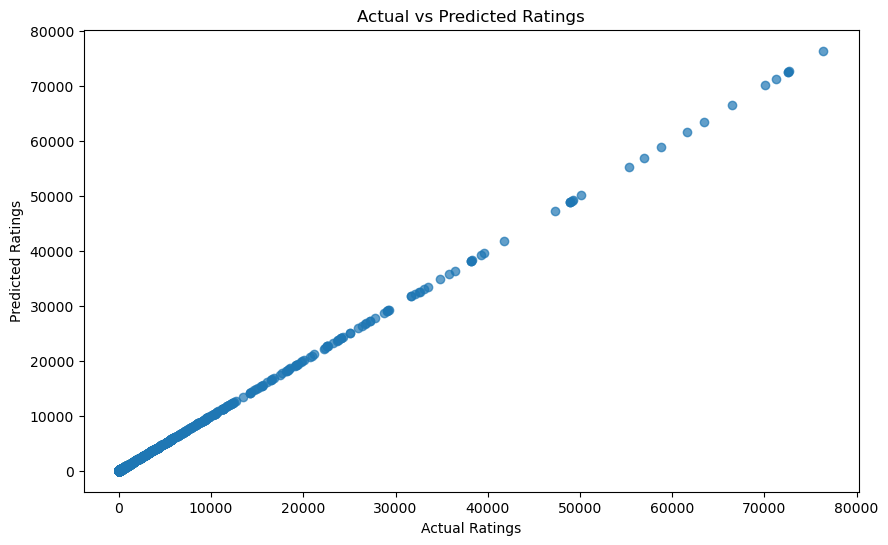

Future Predictions: [5000. 6000. 7000.]


In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()

# Forecast future trends
future_data = pd.DataFrame({
    'price': [300, 400, 500],
    'mrp': [600, 800, 1000],
    'rating': [4.5, 4.7, 4.8],
    'ratingTotal': [5000, 6000, 7000],
    'discount': [20, 25, 30]
})
future_predictions = model.predict(future_data)
print('Future Predictions:', future_predictions)
